In [ ]:
! pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
import pathlib
import glob
import shutil
from zipfile import ZipFile
from IPython.display import FileLink
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('/content/drive/MyDrive/Semester 4/Data Mining/')
zip_ref.close()

In [ ]:
path="/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification/Train"

### Data Information

In [ ]:
path="/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification/Train"

class_names = sorted(os.listdir(path))
n_classes = len(class_names)

class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[1000, 1000, 1000, 954, 1000, 1000, 1000, 1000, 1000, 1000]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-39-beb9bbd0a2a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')


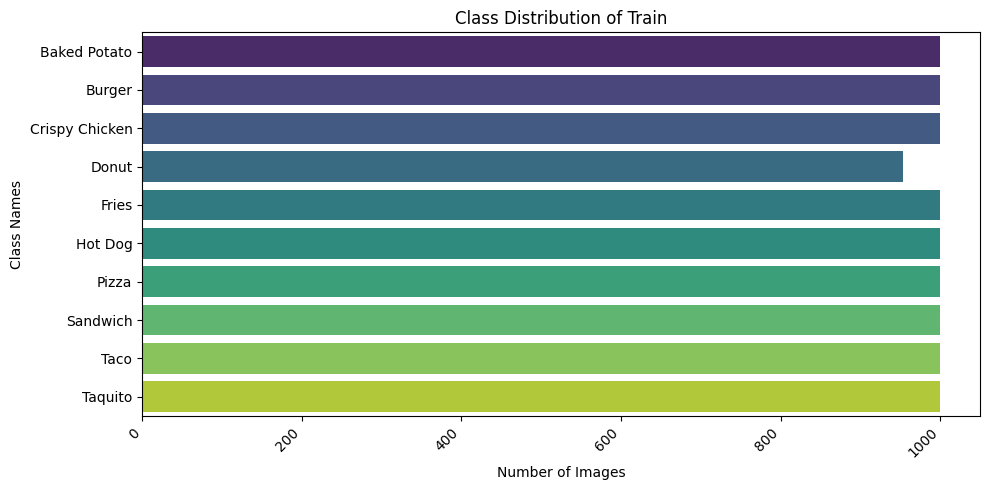

In [ ]:
colors = sns.color_palette('viridis', n_classes)
plt.figure(figsize=(10, 5))
sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')

# Add labels and title
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution of Train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
path="/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification/Valid/"

class_names = sorted(os.listdir(path))
n_classes = len(class_names)

class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[400, 300, 400, 300, 400, 300, 300, 300, 400, 400]


<ipython-input-42-beb9bbd0a2a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')


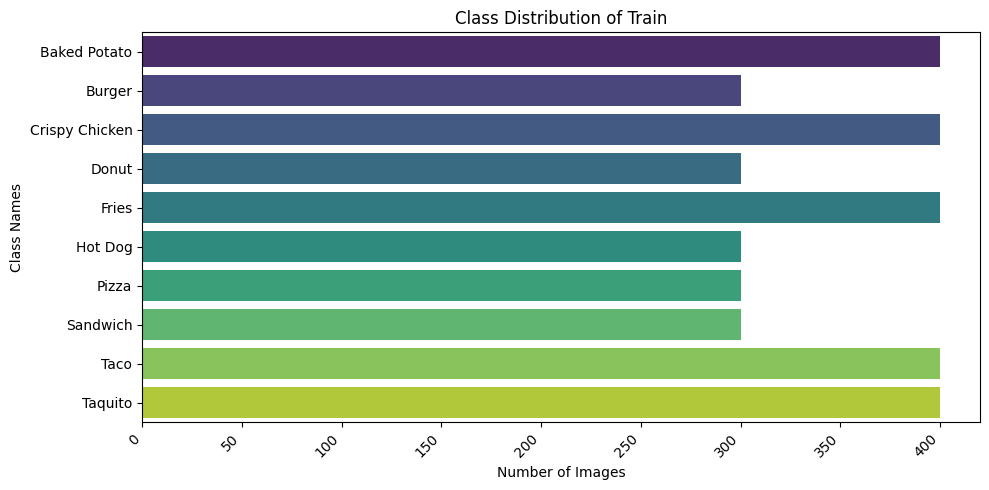

In [ ]:
colors = sns.color_palette('viridis', n_classes)
plt.figure(figsize=(10, 5))
sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')

# Add labels and title
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution of Train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
path="/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification/Test"

class_names = sorted(os.listdir(path))
n_classes = len(class_names)

class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[100, 200, 100, 200, 100, 200, 200, 200, 100, 100]


<ipython-input-44-beb9bbd0a2a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')


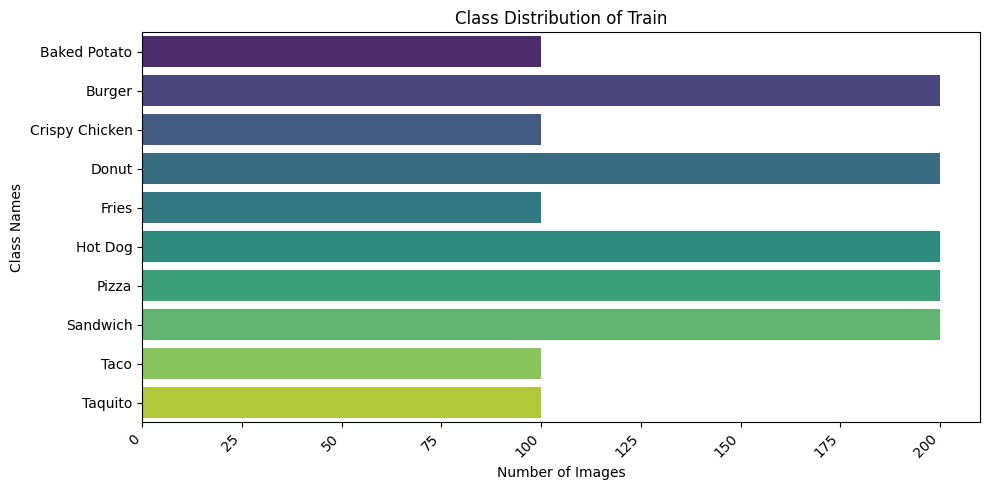

In [ ]:
colors = sns.color_palette('viridis', n_classes)
plt.figure(figsize=(10, 5))
sns.barplot(y=class_names, x=class_dis, palette=colors, orient='h')

# Add labels and title
plt.xlabel('Number of Images')
plt.ylabel('Class Names')
plt.title('Class Distribution of Train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Data Generator

In [ ]:
path_train ="/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification/Train/"
path_validation="/content/drive/MyDrive/Semester 4/Data Mining/Fast Food Classification/Valid/"

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   zoom_range=0.2,
                                   rotation_range=32,
                                   brightness_range=[0.2,1.0],
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(path_train,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(path_validation,
                                                              target_size = (224, 224),
                                                              batch_size = 32,
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 9954 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


### Function Utility

In [ ]:
def show_image_per_class(directory, classes):
    num_classes = len(classes)
    num_rows = 7
    num_cols = 7

    plt.figure(figsize=(15, num_rows * 3))
    for i, class_name in enumerate(classes[:num_rows * num_cols]):
        class_dir = os.path.join(directory, class_name)
        img_file = random.choice(os.listdir(class_dir))
        img_path = os.path.join(class_dir, img_file)
        img = plt.imread(img_path)
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.show()


In [ ]:
def Show_Images(target_gen):
    batch_images, batch_labels = next(target_gen)

    class_labels = list(target_gen.class_indices.keys())

    plt.figure(figsize=(20, 20))
    for n, i in enumerate(list(np.random.randint(0, len(batch_images), 16))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])
        plt.axis('off')
    plt.show()


### Show Images

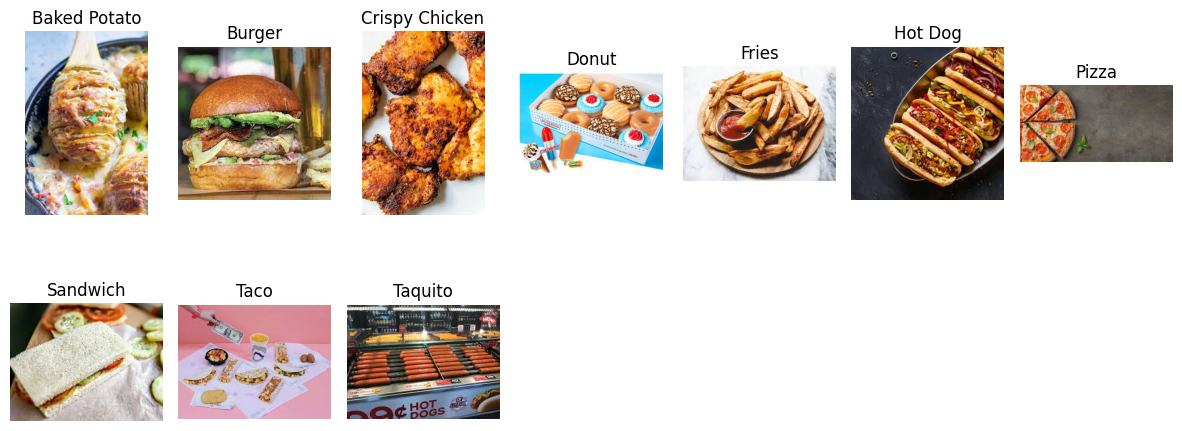

In [ ]:
show_image_per_class(path_train, class_names)

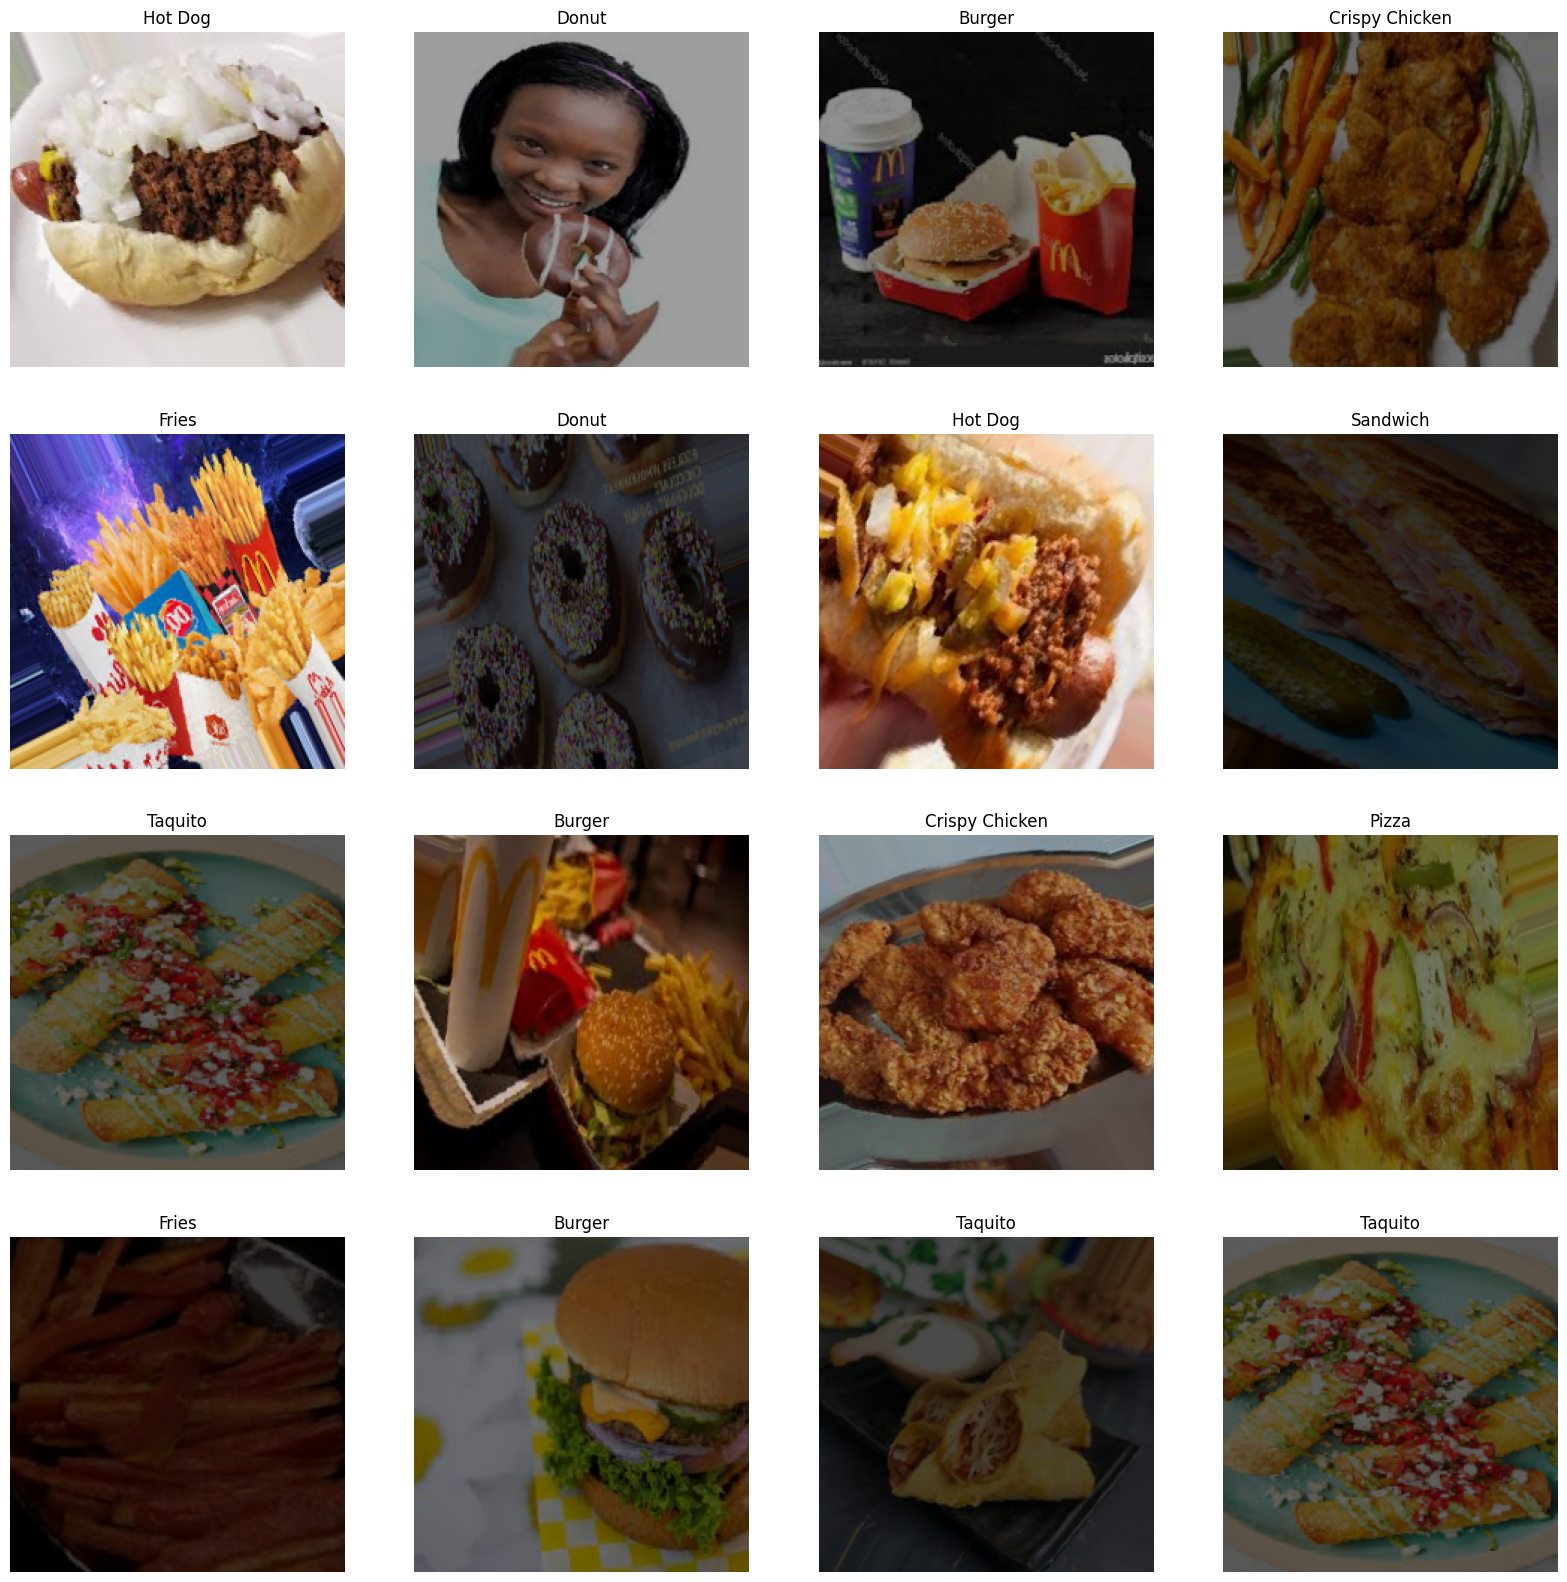

In [ ]:
Show_Images(train_generator)

### Model Training

In [ ]:
input_shape = (224, 224, 3)
pre_trained_model = tf.keras.applications.MobileNetV2(weights="imagenet",
                                include_top=False,
                                input_tensor=tf.keras.layers.Input(shape=input_shape))

for layer in pre_trained_model.layers:
    layer.trainable = True


In [ ]:
model = tf.keras.models.Sequential()

model.add(pre_trained_model)

model.add(tf.keras.layers.Flatten(name="flatten"))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout_2 (Dropout)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8028288   
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              patience=3,
                              factor=0.5,
                              min_lr=1e-6)

In [ ]:
model_name = "model_checkpoint2.keras"

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only=True,
                             verbose=1)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy') > 0.95 ):
      print("\nReached 95% both accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

In [ ]:
history = model.fit(
      train_generator,
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      callbacks=[checkpoint, reduce_lr, callbacks, early_stopping],
      )

Epoch 1/100
312/312 [==============================] - ETA: 0s - loss: 1.5770 - accuracy: 0.5494
Epoch 1: val_accuracy improved from -inf to 0.69229, saving model to model_checkpoint2.keras
312/312 [==============================] - 227s 648ms/step - loss: 1.5770 - accuracy: 0.5494 - val_loss: 1.1623 - val_accuracy: 0.6923 - lr: 1.0000e-04
Epoch 2/100
312/312 [==============================] - ETA: 0s - loss: 0.9154 - accuracy: 0.7313
Epoch 2: val_accuracy improved from 0.69229 to 0.72714, saving model to model_checkpoint2.keras
312/312 [==============================] - 203s 650ms/step - loss: 0.9154 - accuracy: 0.7313 - val_loss: 1.0307 - val_accuracy: 0.7271 - lr: 1.0000e-04
Epoch 3/100
312/312 [==============================] - ETA: 0s - loss: 0.7244 - accuracy: 0.7875
Epoch 3: val_accuracy improved from 0.72714 to 0.74657, saving model to model_checkpoint2.keras
312/312 [==============================] - 206s 661ms/step - loss: 0.7244 - accuracy: 0.7875 - val_loss: 1.0033 - val_ac

### Training and Validation History

In [ ]:
training_history = history.history
training_df = pd.DataFrame(training_history)
print(training_df.tail())

        loss  accuracy  val_loss  val_accuracy        lr
18  0.207755  0.943339  0.738877      0.816286  0.000050
19  0.193776  0.950171  0.691853      0.823143  0.000050
20  0.184696  0.951577  0.733603      0.814857  0.000050
21  0.173719  0.955696  0.688044      0.819143  0.000025
22  0.163439  0.958710  0.693706      0.826571  0.000025


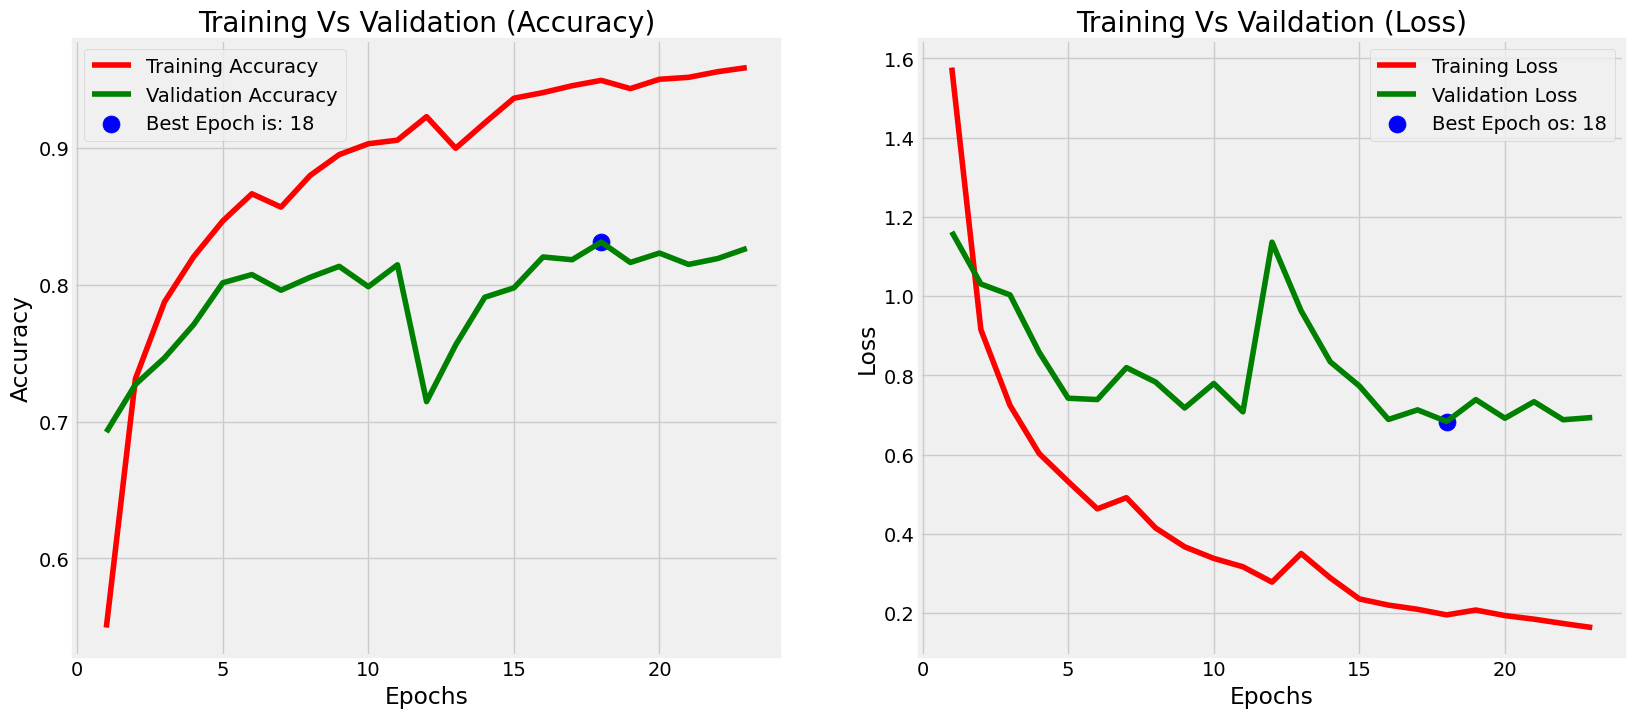

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc= np.argmax(val_acc)

val_lowest= val_loss[index_loss]
val_highest = val_acc[index_acc]

epochs= [i+1 for i in range(len(train_acc))]
acc_label = f"Best Epoch is: {str(index_acc +1)}"
loss_label = f"Best Epoch os: {str(index_loss +1)}"

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs , train_acc , 'r' , label= "Training Accuracy")
plt.plot(epochs , val_acc , 'g' , label= "Validation Accuracy")
plt.scatter(index_acc +1 ,val_highest , s = 150 , c= 'blue', label= acc_label)
plt.title('Training Vs Validation (Accuracy)')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs , train_loss , 'r' , label= "Training Loss")
plt.plot(epochs , val_loss , 'g' , label= "Validation Loss")
plt.scatter(index_loss +1 , val_lowest , s= 150 , c = 'blue' , label= loss_label)
plt.title("Training Vs Vaildation (Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout
plt.show();

In [ ]:
# Save the model in .h5 format
model.save('fast_food_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('model_trained.keras')

In [ ]:
import os

# Tentukan path ke direktori Downloads
save_dir = os.path.expanduser("~/Downloads")
os.makedirs(save_dir, exist_ok=True)

# Tentukan path lengkap untuk file model
model_path = os.path.join(save_dir, "model_trained.h5")

# Simpan model ke dalam file .h5 di direktori Downloads
model.save(model_path)

print(f"Model has been saved to {model_path}")


Model has been saved to /root/Downloads/model_trained.h5
